<a href="https://colab.research.google.com/github/vmccab01/stop_words/blob/main/Copy_of_ProjectA_Problem1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from nltk import PorterStemmer
from nltk.tokenize import word_tokenize
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import os
import numpy as np
import pandas as pd

import sklearn.linear_model
import sklearn.metrics

import matplotlib
import matplotlib.pyplot as plt

In [2]:
# import from github to google collab
SEED = 12345

DATA_DIR = 'data_reviews'

if os.getenv("COLAB_RELEASE_TAG") and not os.path.exists(DATA_DIR):
    !git clone https://github.com/madhuu2211/CS135_ProjectA_Copy.git
    os.chdir(os.path.join('CS135_ProjectA_Copy'))
if not os.path.exists(DATA_DIR):
    raise ValueError("Need to run this script within a valid checkout of the cs135 repo")

# Getting files from github
data_dir = 'data_reviews'
x_train = pd.read_csv(os.path.join(data_dir, 'x_train.csv'))
y_train = pd.read_csv(os.path.join(data_dir, 'y_train.csv'))
x_test = pd.read_csv(os.path.join(data_dir, 'x_test.csv'))

fatal: destination path 'CS135_ProjectA_Copy' already exists and is not an empty directory.


In [3]:
# Displaying
N, n_cols = x_train.shape
M, m_cols = x_test.shape
print("Shape of x_train_df: (%d, %d)" % (N,n_cols))
print("Shape of y_train_df: %s" % str(y_train.shape))
print("Shape of x_test_df: (%d, %d)" % (M,m_cols))

Shape of x_train_df: (2400, 2)
Shape of y_train_df: (2400, 1)
Shape of x_test_df: (600, 2)


In [4]:
# Print out the first five rows and last five rows
tr_text_list = x_train['text'].values.tolist()
rows = np.arange(0, 5)
for row_id in rows:
    text = tr_text_list[row_id]
    print("row %5d | y = %d | %s" % (row_id, y_train.values[row_id,0], text))

print("...")
rows = np.arange(N - 5, N)
for row_id in rows:
    text = tr_text_list[row_id]
    print("row %5d | y = %d | %s" % (row_id, y_train.values[row_id,0], text))

row     0 | y = 0 | Oh and I forgot to also mention the weird color effect it has on your phone.
row     1 | y = 0 | THAT one didn't work either.
row     2 | y = 0 | Waste of 13 bucks.
row     3 | y = 0 | Product is useless, since it does not have enough charging current to charge the 2 cellphones I was planning to use it with.
row     4 | y = 0 | None of the three sizes they sent with the headset would stay in my ears.
...
row  2395 | y = 1 | The sweet potato fries were very good and seasoned well.
row  2396 | y = 1 | I could eat their bruschetta all day it is devine.
row  2397 | y = 1 | Ambience is perfect.
row  2398 | y = 1 | We ordered the duck rare and it was pink and tender on the inside with a nice char on the outside.
row  2399 | y = 1 | Service was good and the company was better!


In [5]:
import requests
import io

url = "https://raw.githubusercontent.com/vmccab01/stop_words/main/words.txt"
page = requests.get(url)
#print(page.text)
stops = page.text.split()
print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'if', 'or', 'because', 'as', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'between', 'into', 'through', 'during', 'before', 'after', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 's', 't', 'can', 'will', 'just', 'don', 'now']


In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Separate the input features and output labels for the training set
x_train_data = x_train['text'].astype(str)
y_train_data = y_train['is_positive_sentiment']

In [8]:
# Create the BoW representation and displaying
vectorizer = CountVectorizer(strip_accents= 'ascii',
                             lowercase = True,
                             min_df = 4,
                             stop_words = stops,
                             max_features = 1200,
                             preprocessor=preprocess_text,
                             binary=True)

NameError: ignored

In [44]:
##''' vocab = cv.fit_transform(x_test_reviews) '''
x_train_bow = vectorizer.fit_transform(x_train_data)
vocabulary_size = len(vectorizer.vocabulary_)

#print(x_train_bow)
print(vocabulary_size)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


805


In [45]:
x_train_bow_array = x_train_bow.toarray()
x_train_bow_df = pd.DataFrame(data=x_train_bow_array,columns = vectorizer.get_feature_names_out())
print(x_train_bow_df)

      abil  abl  abov  absolut  access  act  action  actor  actress  actual  \
0        0    0     0        0       0    0       0      0        0       0   
1        0    0     0        0       0    0       0      0        0       0   
2        0    0     0        0       0    0       0      0        0       0   
3        0    0     0        0       0    0       0      0        0       0   
4        0    0     0        0       0    0       0      0        0       0   
...    ...  ...   ...      ...     ...  ...     ...    ...      ...     ...   
2395     0    0     0        0       0    0       0      0        0       0   
2396     0    0     0        0       0    0       0      0        0       0   
2397     0    0     0        0       0    0       0      0        0       0   
2398     0    0     0        0       0    0       0      0        0       0   
2399     0    0     0        0       0    0       0      0        0       0   

      ...  worth  would  wouldn  wow  write  writte

In [18]:
from nltk.stem.wordnet import WordNetLemmatizer
# Stemming and Lammetization
# Create instance of stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [19]:
# Function to perform stemming/Lammetization on given text
def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'[^\w\s]|[\d]', ' ', text)

    tokens = word_tokenize(text)

    tokens = [token for token in tokens if token]

    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    return ' '.join(stemmed_tokens)


In [10]:
# Create the pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(preprocessor=preprocess_text)),
    ('classifier', LogisticRegression())
])

In [11]:
# Define the hyperparameter grid
param_grid = {
    'vectorizer__max_features': [800, 1000, 1200, 1500],
    'vectorizer__min_df':[4],
    'vectorizer__stop_words':[None, stops],
    'classifier__C': [0.001,0.01,0.1,1,10,100,1000],
    'classifier__penalty': ['l1', 'l2']
}

In [12]:
x_train_col = x_train_data.name
print(x_train_col)

text


In [13]:
# Splitting in to training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=42)

In [15]:
print(x_train)

     website_name                                               text
120        amazon       Everything about this product is wrong.First
283        amazon      If there is a wind, it is completely useless.
1727         yelp  I hate to disagree with my fellow Yelpers, but...
1984         yelp  The food sucked, which we expected but it suck...
647        amazon                      I highly recommend this case.
...           ...                                                ...
1638         yelp   I won't try going back there even if it's empty.
1095         imdb  With the originality and freshness of the firs...
1130         imdb  The movie has almost no action scenes in it an...
1294         imdb             Julian Fellowes has triumphed again.  
860          imdb  Yes, I am simplifying things here for the sake...

[1920 rows x 2 columns]


In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1920, 2)
(480, 2)
(1920, 1)
(480, 1)


In [ ]:
# Perform cross-validation with hyperparameter search
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(x_train['text'].astype(str), y_train['is_positive_sentiment'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv

In [88]:
# Get the best hyperparameter configuration
best_params = grid_search.best_params_
print(best_params)

{'classifier__C': 1, 'classifier__penalty': 'l2', 'vectorizer__max_features': 600, 'vectorizer__min_df': 4, 'vectorizer__stop_words': None}


In [87]:
# Build the final model with the selected hyperparameters
final_model = pipeline.set_params(**best_params)
final_model.fit(x_train['text'].astype(str), y_train['is_positive_sentiment'])

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=600, min_df=4,
                                 preprocessor=<function preprocess_text at 0x7acb22df9a20>)),
                ('classifier', LogisticRegression(C=1))])

In [91]:
# Evaluate the final model on the test set
y_pred = final_model.predict(x_test['text'].astype(str))
print(len(y_test))
#print(classification_report(y_test['is_positive_sentiment'], y_pred))

384


In [76]:
# Generate learning curves to visualize performance
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(final_model, x_train['text'].astype(str), y_train['is_positive_sentiment'], cv=5, scoring='accuracy')

In [77]:
# Calculate the average and standard deviation of performance
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

In [78]:
# Calculate average performance
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
print(train_scores_mean)
print(val_scores_mean)

[0.74262295 0.8406015  0.88651852 0.89863302 0.90456026]
[0.58594907 0.69009899 0.73764119 0.76953551 0.78711028]


In [79]:
# Calculate uncertainty
train_scores_std = np.std(train_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
print(train_scores_std)
print(val_scores_std)

[0.00983607 0.01116344 0.00803832 0.00349385 0.0040684 ]
[0.03055437 0.02190909 0.01557036 0.01841484 0.00885845]


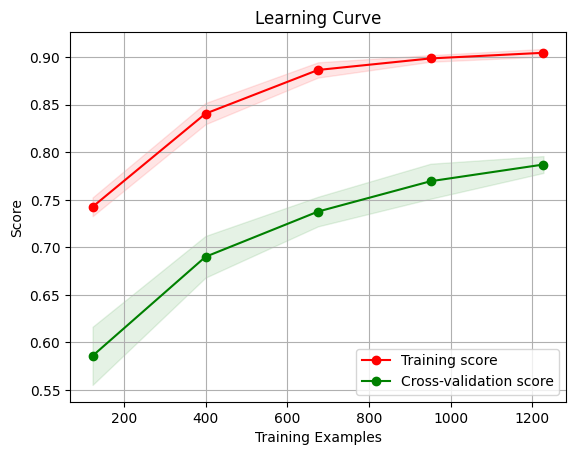

In [80]:
# Plot the learning curve with uncertainty
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

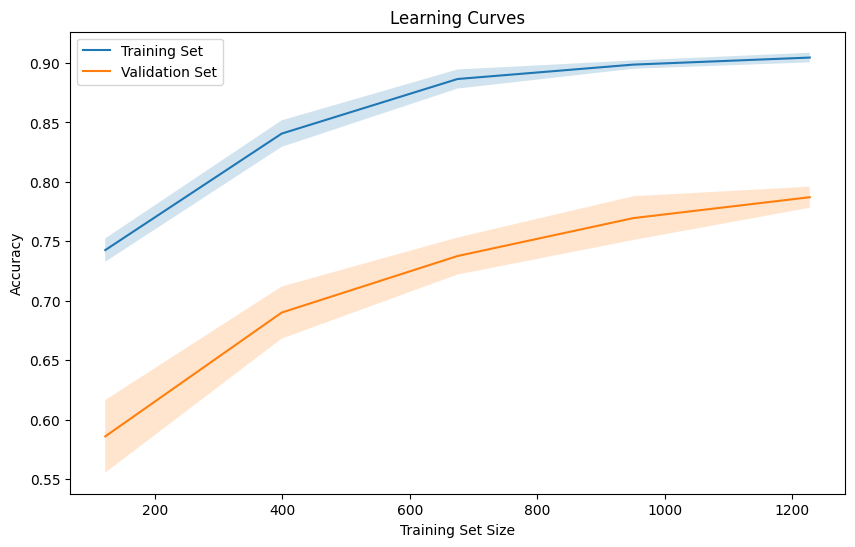

In [81]:
# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Set')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, val_mean, label='Validation Set')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()

In [82]:
x_test = pd.read_csv(os.path.join(data_dir, 'x_test.csv'))

In [92]:
# Make predictions on the test data
test_data = x_test
y_pred = final_model.predict(test_data['text'].astype(str))
# Print y_pred as a single column in plain text
for label in y_pred:
   print(label)
#print(y_pred_column)

1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
1
0
1
0
1
1
1
0
0
1
0
1
0
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
0
1
1
1
1
1
1
1
0
1
1
1
1
0
0
1
1
1
0
1
0
1
0
0
1
1
1
1
1
1
0
1
0
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
0
1
1
1
0
1
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
1
1
0
1
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
0
0
1
0
0
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
1
0
1
1
1
0
0
1
1
1
0
1
1
1
1
0
1
1
0
0
1
0
0
1
0
1
0
1
0
1
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0


In [84]:
# Create a DataFrame with the predicted labels and text data
predictions = pd.DataFrame({'Predicted Label': y_pred, 'Text Data': x_test['text']})

In [85]:
# Display the table
print(predictions)

     Predicted Label                                          Text Data
0                  1  It only recognizes the Phone as its storage de...
1                  0  Disappointing accessory from a good manufacturer.
2                  0  The one big drawback of the MP3 player is that...
3                  0  This particular model would not work with my M...
4                  0  If the two were seperated by a mere 5+ ft I st...
..               ...                                                ...
595                1                Everything was fresh and delicious!
596                1          - Really, really good rice, all the time.
597                1                              Pretty awesome place.
598                1        The staff are great, the ambiance is great.
599                1            The patio seating was very comfortable.

[600 rows x 2 columns]


In [ ]:
# Create confusion matrix
#print(y_pred, y_test)
#conf_matrix = confusion_matrix